# Fourier spectral methods in Matlab (and Python)

Developed by Randy LeVeque for a course on Approximation Theory and Spectral Methods at the University of Washington.

See <http://faculty.washington.edu/rjl/classes/am570a2015/codes.html> for more IPython Notebook examples.

These examples are based on material in Nick Trefethen's book Spectral Methods in Matlab.  The m-files for this book are available at <http://people.maths.ox.ac.uk/trefethen/spectral.html>

In [1]:
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-a771861e-c2c8-49f7-a3e6-8197ccac5b03
Send 'exit' command to kill the server
............................................MATLAB started and connected!


/Users/rjl/anaconda/envs/jupyter/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


## Program 5

This example is directly from p5.m found at  <http://people.maths.ox.ac.uk/trefethen/spectral.html>

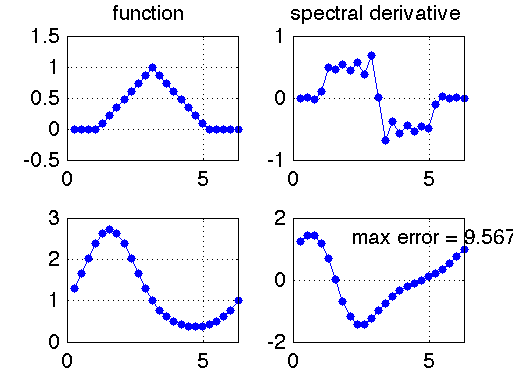

In [2]:
%%matlab

% p5.m - repetition of p4.m via FFT
%        For complex v, delete "real" commands.

% Differentiation of a hat function:
  N = 24; h = 2*pi/N; x = h*(1:N)';
  v = max(0,1-abs(x-pi)/2); v_hat = fft(v);
  w_hat = 1i*[0:N/2-1 0 -N/2+1:-1]' .* v_hat;
  w = real(ifft(w_hat)); clf
  subplot(2,2,1), plot(x,v,'.-','markersize',13)
  axis([0 2*pi -.5 1.5]), grid on, title('function')
  subplot(2,2,2), plot(x,w,'.-','markersize',13)
  axis([0 2*pi -1 1]), grid on, title('spectral derivative')

% Differentiation of exp(sin(x)):
  v = exp(sin(x)); vprime = cos(x).*v;
  v_hat = fft(v);
  w_hat = 1i*[0:N/2-1 0 -N/2+1:-1]' .* v_hat;
  w = real(ifft(w_hat));
  subplot(2,2,3), plot(x,v,'.-','markersize',13)
  axis([0 2*pi 0 3]), grid on
  subplot(2,2,4), plot(x,w,'.-','markersize',13)
  axis([0 2*pi -2 2]), grid on
  error = norm(w-vprime,inf);
  text(2.2,1.4,['max error = ' num2str(error)])


## Illustration of spectral differentiation

To make this a bit clearer, first illustrate how to compute the second derivative of periodic function.
Start with $$u = \exp(\cos(x)),$$ and check that the numerical approximation agrees well with $$u''(x) = (\sin^2(x) - \cos(x))  \exp(\cos(x)).$$

The only tricky thing here is the order of the indices in the wave number vector.

In [3]:
%%matlab
N = 16;
x = linspace(2*pi/N,2*pi,N);
ik = 1i*[0:N/2 -N/2+1:-1];   % i * wave number vector (matlab ordering)
ik2 = ik.*ik;                    % multiplication factor for second derivative

u = exp(cos(x));
u_hat = fft(u);
v_hat = ik2 .* u_hat;
v = real(ifft(v_hat));     % imaginary part should be at machine precision level

error = v - (sin(x).^2 - cos(x)) .* exp(cos(x));
norm(error,inf)

ans =
     3.909521448797193e-07


## Illustration of solving a periodic boundary value problem

Now let's solve the boundary value problem
$$u''(x) = f(x)$$
on $0 \leq x \leq 2\pi$ with periodic boundary conditions and the constraint $\int_0^{2\pi} u(x) dx = 0$.

Use $f(x) = (\sin^2(x) - \cos(x))  \exp(\cos(x))$ so the solution should be $u(x) = \exp(\cos(x)) + C$, where the constant is chosen so the integral constraint is satisfied.

We now have to divide by `ik2`, with the complication that 1/0 should be replaced by 0.  This results in the $\hat u_0 = 0$, which gives the integral constraint.

In [4]:
%%matlab

N = 16;
x = linspace(2*pi/N,2*pi,N);
f = (sin(x).^2 - cos(x)) .* exp(cos(x));
f_hat = fft(f);

ik = 1i*[0:N/2 -N/2+1:-1];   % i * wave number vector (matlab ordering)
ik2 = ik.*ik;         % multiplication factor for second derivative
ii = find(ik ~= 0);   % indices where ik is nonzero
ik2inverse = ik2;     % initialize zeros in same locations as in ik2
ik2inverse(ii) = 1./ik2(ii);   % multiplier factor to solve u'' = f

u_hat = ik2inverse .* f_hat;
u = real(ifft(u_hat));   % imaginary parts should be roundoff level

Plotting the solution shows that it is a shifted version of $\exp(\cos(x))$:

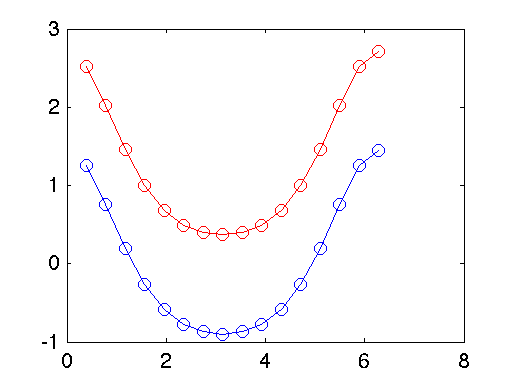

In [5]:
%%matlab
plot(x,u,'b-o')
hold on
v = exp(cos(x));
plot(x,v,'r-o')

If we shift so that one value of $u$ agrees with $v$, then we hope everything will line up:

In [6]:
%%matlab
u2 = u + v(1)-u(1);
norm(u2 - v, inf)

ans =
     1.567908380906147e-08


## Python versions:

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We repeat these examples in Python. The codes are essentially identical, with some changes from Matlab to Python notation.

First illustrate how to compute the second derivative of periodic function.
Start with $$u = \exp(\cos(x)),$$ and check that the numerical approximation agrees well with $$u''(x) = (\sin^2(x) - \cos(x))  \exp(\cos(x))$$

In [8]:
from scipy import fft,ifft
N = 16;
x = linspace(2*pi/N,2*pi,N)

ik = 1j*hstack((range(0,N/2+1), range(-N/2+1,0)));   # i * wave number vector (matlab ordering)
ik2 = ik*ik;          # multiplication factor for second derivative

u = exp(cos(x))
u_hat = fft(u)
v_hat = ik2 * u_hat
v = real(ifft(v_hat))     # imaginary part should be at machine precision level

error = v - (sin(x)**2 - cos(x)) * exp(cos(x))
norm(error,inf)



3.9095215287332508e-07

Now let's solve the boundary value problem
$$u''(x) = f(x)$$
on $0 \leq x \leq 2\pi$ with periodic boundary conditions and the constraint $\int_0^{2\pi} u(x) dx = 0$.

Use $f(x) = (\sin^2(x) - \cos(x))  \exp(\cos(x))$ so the solution should be $u(x) = \exp(\cos(x)) + C$, where the constant is chosen so the integral constraint is satisfied.

-c:8: RuntimeWarning: divide by zero encountered in divide
-c:8: RuntimeWarning: invalid value encountered in divide


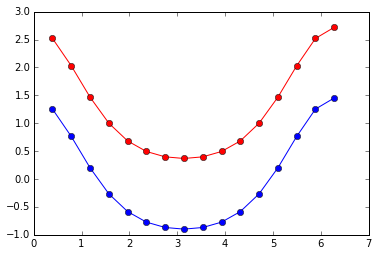

In [9]:

N = 16;
x = linspace(2*pi/N,2*pi,N)
f = (sin(x)**2 - cos(x)) * exp(cos(x))
f_hat = fft(f)
ik = 1j*hstack((range(0,N/2+1), range(-N/2+1,0)));   # i * wave number vector (matlab ordering)
ik2 = ik*ik;          # multiplication factor for second derivative
ik2inverse = where(ik2 != 0, 1./ik2, 0.)
u_hat = ik2inverse * f_hat;
u = real(ifft(u_hat))

plot(x,u,'b-o')
v = exp(cos(x));
plot(x,v,'r-o')



Again we get good agreement if we shift by the difference at the left-most point:

In [10]:
u2 = u + v[0]-u[0]
norm(u2 - v, inf)

1.5679084253150677e-08